# Economic_relevance_usingNLP

Our main aim is to give a brief overview of performing text classification using Naive Bayes, Logistic Regression, Support Vector Machines and Decision Tree Classifier. We will be using a dataset called "Economic news article tone and relevance" which consists of approximately 8000 news articles, which were tagged as relevant or not relevant to the US Economy. Our goal in this kernel is to explore the process of training and testing text classifiers for this dataset.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df=pd.read_csv("US-Economic-News.csv",encoding = 'ISO-8859-1') 
#dataset contains other columns which are not considered here as we are only trying to predict relevance using NLP
df=df[['text','relevance']]

In [3]:
df.head()

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,yes
1,The Wall Street Journal Online</br></br>The Mo...,no
2,WASHINGTON -- In an effort to achieve banking ...,no
3,The statistics on the enormous costs of employ...,no
4,NEW YORK -- Indecision marked the dollar's ton...,yes


In [4]:
df.shape

(8000, 2)

In [5]:
df.relevance.value_counts()

no          6571
yes         1420
not sure       9
Name: relevance, dtype: int64

# Here "not sure" values doesnot help us to check the relevance, so let us drop those values

In [6]:
df = df[df.relevance != "not sure"]
df.shape

(7991, 2)

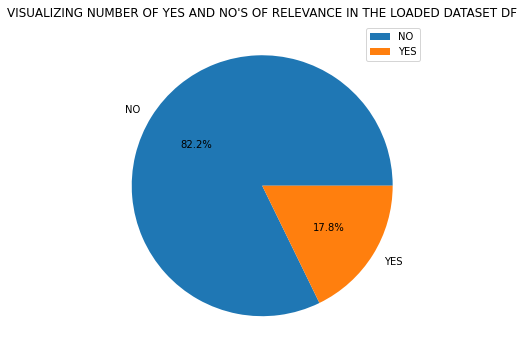

In [7]:
a=['NO','YES']
plt.figure(figsize=(12,6))
plt.pie(df.relevance.value_counts(),labels=a,autopct = "%1.1f%%")
plt.title("VISUALIZING NUMBER OF YES AND NO'S OF RELEVANCE IN THE LOADED DATASET DF")
plt.legend()
plt.show()

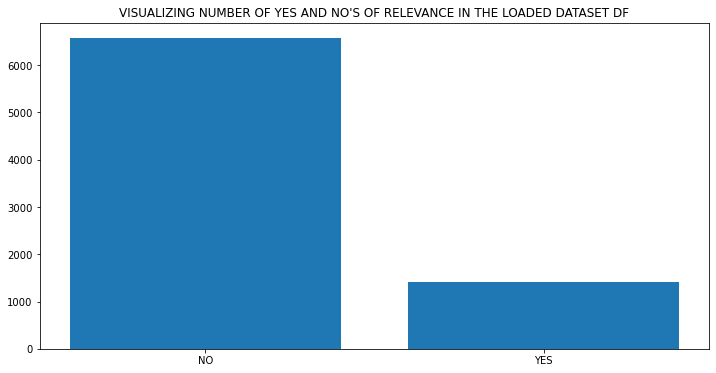

In [8]:
a=['NO','YES']
plt.figure(figsize=(12,6))
plt.bar(a,df.relevance.value_counts())
plt.title("VISUALIZING NUMBER OF YES AND NO'S OF RELEVANCE IN THE LOADED DATASET DF")
plt.show()

In [9]:
#label encoding relevance column of dataset which contain categorical data of YES or NO.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['relevance']= label_encoder.fit_transform(df['relevance'])
df['relevance'].unique()

array([1, 0])

In [54]:
df.relevance.value_counts()

0    6571
1    1420
Name: relevance, dtype: int64

# Preprocessing the text data using NLTK's library and cleaning and stemming a text corpus and also storing the text finally in corpus list

In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0, 7991):
    review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['text'])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
print(corpus[:1])

['new york yield certif deposit offer major bank drop tenth percentag point latest week reflect overal declin short term interest rate br br small denomin consum cd sold directli bank averag yield six month deposit fell week end yesterday accord bank survey banxquot money market wilmington del inform servic br br three month consum deposit averag yield sank week accord banxquot two bank banxquot survey citibank new york corest pennsylvania pay less threemonth small denomin cd br br declin somewhat smaller five year consum cd eas banxquot said br br yield three month six month treasuri bill sold monday auction plummet fifth percentag point previou week respect']


# Creating the Bag of Words model

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 27000)
X = cv.fit_transform(corpus).toarray()
y = df['relevance']

In [13]:
len(X[0])

27000

# Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
y_train

6414    0
4779    1
598     1
827     0
676     0
       ..
4937    0
3268    0
1654    0
2610    1
2735    1
Name: relevance, Length: 6392, dtype: int32

# BUILDING MODELS AND TRAINING THEM ON TRAIN DATA AND PREDICTIONG TEST DATA 

1.NAIVE BAYES CLASSIFICATION

In [29]:
gnb = GaussianNB() 
%time gnb.fit(X_train, y_train)

y_pred_train_NB = gnb.predict(X_train)
y_pred_test_NB = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train_NB))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test_NB))

Wall time: 4.8 s

Training Accuracy score: 0.9333541927409261
Testing Accuracy score: 0.7648530331457161


In [30]:
print(classification_report(y_test, y_pred_test_NB, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.85      0.87      0.86      1309
    relevant       0.33      0.29      0.31       290

    accuracy                           0.76      1599
   macro avg       0.59      0.58      0.58      1599
weighted avg       0.75      0.76      0.76      1599



0.7648530331457161

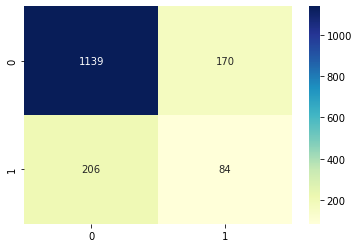

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
#out of all the above models naives bayes model has higher accuracy than others
cm = confusion_matrix(y_test,y_pred_test_NB)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
accuracy_score(y_test, y_pred_test_NB)

# 

2. LOGISTIC REGRESSION

In [27]:
lr = LogisticRegression()
%time lr.fit(X_train, y_train)

y_pred_train_LR = lr.predict(X_train)
y_pred_test_LR = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train_LR))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test_LR))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 12 s

Training Accuracy score: 0.9964017521902377
Testing Accuracy score: 0.7598499061913696


In [31]:
print(classification_report(y_test, y_pred_test_LR, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.84      0.87      0.86      1309
    relevant       0.31      0.26      0.28       290

    accuracy                           0.76      1599
   macro avg       0.57      0.56      0.57      1599
weighted avg       0.74      0.76      0.75      1599



0.7598499061913696

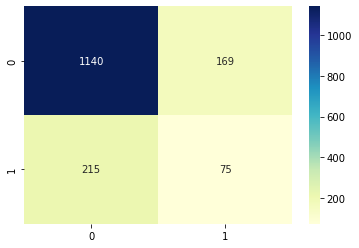

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
#out of all the above models naives bayes model has higher accuracy than others
cm = confusion_matrix(y_test,y_pred_test_LR)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
accuracy_score(y_test, y_pred_test_LR)

# 

3.Support Vector Machine

In [32]:
svc =  LinearSVC(class_weight='balanced') 
%time svc.fit(X_train, y_train)

y_pred_train_SVC = svc.predict(X_train)
y_pred_test_SVC = svc.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train_SVC))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test_SVC))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Wall time: 2.33 s

Training Accuracy score: 0.9996871088861077
Testing Accuracy score: 0.7129455909943715


In [33]:
print(classification_report(y_test, y_pred_test_SVC, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.84      0.80      0.82      1309
    relevant       0.26      0.30      0.28       290

    accuracy                           0.71      1599
   macro avg       0.55      0.55      0.55      1599
weighted avg       0.73      0.71      0.72      1599



0.7129455909943715

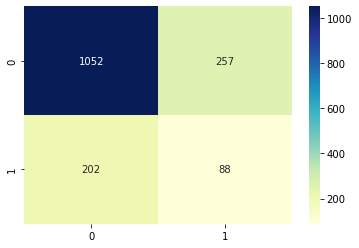

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
#out of all the above models naives bayes model has higher accuracy than others
cm = confusion_matrix(y_test,y_pred_test_SVC)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
accuracy_score(y_test, y_pred_test_SVC)

# 

4.Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
%time dt.fit(X_train, y_train)

y_train = np.array(y_train)
y_test = np.array(y_test)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Wall time: 2min 16s

Training Accuracy score: 1.0
Testing Accuracy score: 0.7467166979362101


In [42]:
print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.83      0.86      0.85      1309
    relevant       0.27      0.23      0.25       290

    accuracy                           0.75      1599
   macro avg       0.55      0.54      0.55      1599
weighted avg       0.73      0.75      0.74      1599



0.7467166979362101

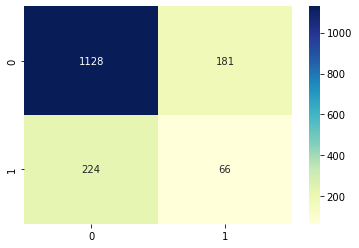

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
#out of all the above models naives bayes model has higher accuracy than others
cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
accuracy_score(y_test, y_pred_test)

# Making the Confusion Matrix

0.7648530331457161

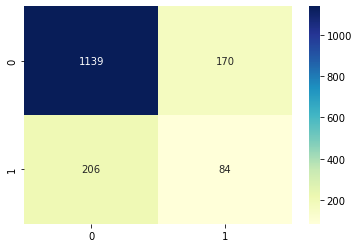

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
#out of all the above models naives bayes model has higher accuracy than others
cm = confusion_matrix(y_test,y_pred_test_NB)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
accuracy_score(y_test, y_pred_test_NB)

In [43]:
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    words = [ps.stem(word) for word in words if word not in all_stopwords]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [45]:
x="WASHINGTON -- The Conference Board's index of leading indicators moved up slightly in March, signaling that U.S. economic expansion probably will continue vigorously through 1998.</br></br>Michael D. Boldin, director of business-cycle research at the New York business-research organization, said the economic omens point to continued strong growth in gross domestic product in the months ahead.</br></br>It looks like above 3% is not impossible for the whole year, Mr. Boldin said. Last week, the government reported that the economy expanded in the first quarter at an annualized rate of 4.2%, but few economists believe that"
preprocessed_x=preprocess_text(x)

In [46]:
import pickle
pickle.dump(gnb,open('Economic_relevance_usingNLP.pkl','wb'))

In [47]:
Model_log = pickle.load(open('Economic_relevance_usingNLP.pkl','rb'))
Model_log

GaussianNB()

In [53]:
# Create a list containing the preprocessed text
preprocessed_x_list = [preprocessed_x]

#Transform the list of preprocessed text
modified_X = cv.transform(preprocessed_x_list)

dense_X = modified_X.toarray()

predicted_result = Model_log.predict(dense_X)
print("Predicted Result:", predicted_result[0]) #1-->YES        0-->NO

Predicted Result: 1
